In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
# Generate a sample of 100 numbers from a standard normal distribution
sample1 = np.random.normal(loc=0, scale=1, size=100)
sample2 = np.random.normal(loc=0, scale=1, size=100)
sample3 = np.random.normal(loc=0, scale=1, size=100)
sample4 = np.random.normal(loc=0, scale=1, size=100)
sample5 = np.random.normal(loc=0, scale=1, size=100)

In [8]:
sample1

array([ 1.83531879,  0.18091534, -0.33718344,  2.43794452,  0.91940013,
        0.81719743, -0.10937553, -2.16735538,  0.7276923 , -1.21367162,
        0.6105735 , -0.06575492, -0.04121997, -0.27486147, -0.98603688,
        0.16192054, -0.59456188,  0.17990139, -0.74047755, -0.98459083,
        0.2909971 ,  0.86225268,  2.28090684, -0.65814743,  0.84115788,
        0.01043747, -0.40060911, -0.2095294 ,  0.27801619, -0.12093875,
        0.48090023,  0.10819334,  0.18415727,  2.11877582, -0.42972037,
       -0.83099071, -0.50005884,  0.80969428, -0.98417157, -0.23978766,
       -0.58486061,  0.20341853,  0.20745518,  1.32419931, -2.6909221 ,
        0.01008316, -1.29157925, -1.24563389, -0.7061505 , -2.05874744,
       -1.54417973,  0.68963469,  1.80293742,  0.21516636,  0.9880054 ,
       -0.52799535, -0.37080139,  0.89600115, -0.09896465,  0.01091829,
        0.72276372,  0.41360357, -0.80748899,  1.44394307, -0.18301282,
        1.43544123, -1.77669603, -0.91086862, -0.57483163, -0.21

<Axes: ylabel='Density'>

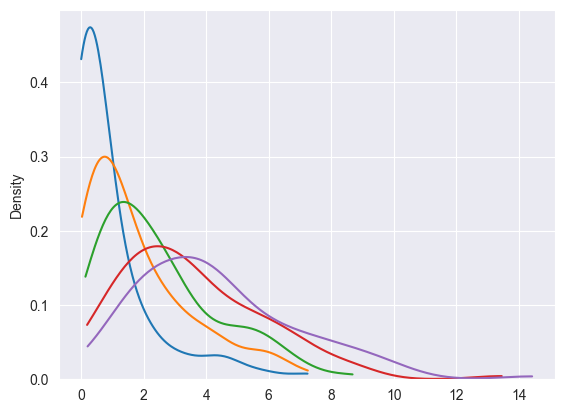

In [9]:
x = sample1 ** 2
y = sample1 ** 2 + sample2 ** 2
z = sample1 ** 2 + sample2 ** 2 + sample3 ** 2
u = sample1 ** 2 + sample2 ** 2 + sample3 ** 2 + sample4 ** 2
v = sample1 ** 2 + sample2 ** 2 + sample3 ** 2 + sample4 ** 2 + sample5 ** 2

sns.kdeplot(x, clip=(x.min(), x.max()))
sns.kdeplot(y, clip=(y.min(), y.max()))
sns.kdeplot(z, clip=(z.min(), z.max()))
sns.kdeplot(u, clip=(u.min(), u.max()))
sns.kdeplot(v, clip=(v.min(), v.max()))

## Chi-Squared Test for Goodness of Fit

In [10]:
import scipy.stats as stats

test_statistic = 6.49  # Chi-Square test statistic from the previous example
degree_of_freedom = 6

# Calculate the p value sing the chi2 survival function (sf)
p_value = stats.chi2.sf(test_statistic, degree_of_freedom)

print(p_value)


0.37059153414483736


In [11]:
# For Die Example

test_statistic = 1  # Chi-Square test statistic from the previous example
degree_of_freedom = 5

# Calculate the p value sing the chi2 survival function (sf)
p_value = stats.chi2.sf(test_statistic, degree_of_freedom)

print(p_value)


0.9625657732472964


In [12]:
test_statistic = 11
degree_of_freedom = 6

p_value = stats.chi2.sf(test_statistic, degree_of_freedom)
print(p_value)

0.08837643235678545


In [13]:
test_statistic = 19.6
degree_of_freedom = 4

p_value = stats.chi2.sf(test_statistic, degree_of_freedom)
print(p_value)

0.000598877273867511


## Titanic Case Study

In [16]:
from scipy.stats import chisquare
import pandas as pd

data = pd.read_csv(
    'C://Sajjad//Learnings//Data Science Mentorship Program 2.0//Week 21 - Hypothesis Testing//session 46//train.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
class_counts = data['Pclass'].value_counts().sort_index()
class_counts

Pclass
1    216
2    184
3    491
Name: count, dtype: int64

We are saying there are total = 891 / 3 = 297 in each class

In [18]:
# Calculate the expected counts assuming a uniform distribution
total_passengers = len(data)
expected_counts = total_passengers / 3
expected = [expected_counts] * 3
print('Expected Passenger Counts (assuming uniform distribution):\n', expected)

Expected Passenger Counts (assuming uniform distribution):
 [297.0, 297.0, 297.0]


In [21]:
# Perform Chi-Square Goodness of Fit test
chi2, p_value = chisquare(class_counts, expected)

# Printing
print('\nChi-Squared Statistics: {:.2f}'.format(chi2))
print('p_value: {:.6f}'.format(p_value))


Chi-Squared Statistics: 191.80
p_value: 0.000000


Since we are getting the p_value very small. There is no way we can say that the people are distributed EQUALLY among all the classes

In [22]:
alpha = 0.05
if p_value < alpha:
    print('\nWe reject the null hypothesis. The distribution of passengers among the classes is not uniform')
else:
    print('\nWe fail to reject the null hypothesis. The distribution of passengers among the classes is uniform')


We reject the null hypothesis. The distribution of passengers among the classes is not uniform


## Test for independence

In [23]:
test_statistic = 9.95
degree_of_freedom = 4

p_value = stats.chi2.sf(test_statistic, degree_of_freedom)
print(p_value)

0.04127840066324082


#### Python Case study on titanic

In [30]:
# We will use the Chi-Square test for independence to see if the survival rate of passengers is independent of the Pclass
from scipy.stats import chi2_contingency
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
contingency_table = pd.crosstab(data['Survived'], data['Pclass'])
contingency_table

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [31]:
# Perform the Chi-Squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("\nChi-Square Statistic: {:.2f}".format(chi2))
print("P-value: {:.4f}".format(p_value))
print("Degrees of Freedom: {}".format(dof))
print("Expected Frequencies: \n{}".format(expected))


Chi-Square Statistic: 102.89
P-value: 0.0000
Degrees of Freedom: 2
Expected Frequencies: 
[[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


In [32]:
# Interpret the results
alpha = 0.05
if p_value < alpha:
    print(
        "\nWe reject the null hypothesis. There is a significant association between passenger class and survival rate.")
else:
    print(
        "\nWe fail to reject the null hypothesis. There is no significant association between passenger class and survival rate.")


We reject the null hypothesis. There is a significant association between passenger class and survival rate.
